<a href="https://colab.research.google.com/github/Sedighe-Raeisi/NLP-Sentiment-Analysis-/blob/main/Tweet_Sentiment_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
df=pd.read_csv(path)

#Data Visualization 

In [ ]:
neg=len(df[df['sentiment']=='negative'])
pos=len(df[df['sentiment']=='positive'])

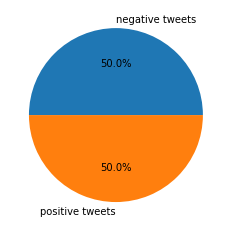

In [ ]:
plt.pie([neg,pos],labels=['negative tweets','positive tweets'], autopct='%2.1f%%');

#Importing data from link:
https://www.kaggle.com/kazanova/sentiment140

In [ ]:
!pip install kaggle

In [ ]:
!mkdir  -p /root/.kaggle/

In [ ]:
!cp /content/drive/MyDrive/MachineLearning/kaggle.json -r /root/.kaggle/

In [ ]:
!chmod 600 ~ /root/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 96% 78.0M/80.9M [00:00<00:00, 151MB/s]
100% 80.9M/80.9M [00:00<00:00, 149MB/s]


In [ ]:
!cp /content/sentiment140.zip -r /content/drive/MyDrive/MachineLearning/NLP

In [ ]:
!unzip /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip -d /content/drive/MyDrive/MachineLearning/NLP

Archive:  /content/drive/MyDrive/MachineLearning/NLP/sentiment140.zip
  inflating: /content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv  


##Preparing the dataframe

In [ ]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
data=pd.read_csv(path
               ,encoding='latin-1'
               )

In [ ]:
data.columns

Index(['Unnamed: 0', 'sentiment', 'tweet', 'clean'], dtype='object')

In [ ]:
set(data['0'])

In [ ]:
df=pd.DataFrame()

In [ ]:
def sentiment(x):
  if x==4:
    return 'positive'
  elif x==0:
    return 'negative'

In [ ]:
df['sentiment']=data['0'].apply(lambda x: sentiment(x) )

In [ ]:
df['tweet']=data.iloc[:,5]

In [ ]:
del data

In [ ]:
df.head(2)

In [ ]:
df.isnull().sum()

In [ ]:
(set(df['sentiment']))

#Preprocessing:


##Preprocessing Tweets:

In [ ]:
df.head()

,sentiment,tweet
0,negative,is upset that he can't update his Facebook by ...
1,negative,@Kenichan I dived many times for the ball. Man...
2,negative,my whole body feels itchy and like its on fire
3,negative,"@nationwideclass no, it's not behaving at all...."
4,negative,@Kwesidei not the whole crew


In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [ ]:

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
  sentence=str(sentence)
  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  sentence=sentence.replace('{@}',"")
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(rem_num)  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  stem_words=[stemmer.stem(w) for w in filtered_words]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(filtered_words)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['clean']=df['tweet'].apply(lambda x: preprocess(x))

In [ ]:
df.to_csv(path)

In [ ]:
df.isnull().sum()

Unnamed: 0      0
sentiment       0
tweet           0
clean         844
dtype: int64

In [ ]:
path='/content/drive/MyDrive/MachineLearning/NLP/training.1600000.processed.noemoticon.csv'
df=pd.read_csv(path)

In [ ]:
df.isnull().sum()

Unnamed: 0      0
sentiment       0
tweet           0
clean         844
dtype: int64

In [ ]:
df.dropna(inplace=True)


##Preprocessing labels

In [4]:
df.dropna(inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder 

In [6]:
le=LabelEncoder()

In [7]:
y=le.fit_transform(df['sentiment'])

In [8]:
y

array([0, 0, 0, ..., 1, 1, 1])

# X

In [9]:
x=df['clean']

#Small Bert

In [10]:
!pip install -q -U tensorflow-text

     |████████████████████████████████| 4.9 MB 3.4 MB/s 


In [11]:
!pip install -q tf-models-official

     |████████████████████████████████| 1.8 MB 4.4 MB/s 
     |████████████████████████████████| 352 kB 63.1 MB/s 
     |████████████████████████████████| 47.6 MB 1.9 MB/s 
     |████████████████████████████████| 1.2 MB 43.8 MB/s 
     |████████████████████████████████| 596 kB 26.7 MB/s 
     |████████████████████████████████| 213 kB 47.3 MB/s 
     |████████████████████████████████| 90 kB 7.6 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 99 kB 7.9 MB/s 
     |████████████████████████████████| 1.1 MB 49.7 MB/s 


In [12]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer


##Small Bert 128:

Preprocess:

In [13]:
map_model_to_preprocess={
    # 'small_bert/bert_en_uncased_L-2_H-512_A-8':
    #     'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
        }

In [14]:
tfhub_handle_preprocess = map_model_to_preprocess[
                                                  # 'small_bert/bert_en_uncased_L-2_H-512_A-8'
                                                  'small_bert/bert_en_uncased_L-2_H-128_A-2'
                                                  ]

In [15]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

Model:

In [16]:
map_name_to_handle={
    # 'small_bert/bert_en_uncased_L-2_H-512_A-8':
    #     'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1'
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1'
        }

In [17]:
tfhub_handle_encoder = map_name_to_handle[
                                          # 'small_bert/bert_en_uncased_L-2_H-512_A-8'
                                          'small_bert/bert_en_uncased_L-2_H-128_A-2'
                                          ]


In [18]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

#Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

I decreased the size of dataset, to have an acceptable training time length.

In [66]:
x_used, x_unused, y_used, y_unused=train_test_split(x,y, test_size=
                                                    .5
                                                    # .95
                                                    , stratify=y, random_state=48)

In [67]:
x_train, x_test, y_train, y_test=train_test_split(x_used,y_used, test_size=.2, stratify=y_used, random_state=47)

In [22]:
print(f'x_train={x_train.shape} , y_train={y_train.shape}\nx_test={x_test.shape} , y_test={y_test.shape} ')

x_train=(63965,) , y_train=(63965,)
x_test=(15992,) , y_test=(15992,) 


#(smal bert) bert Model: 

###Model:

In [23]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [27]:
def build_classifier_model():
  text_input = Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = Dropout(0.2, name='Dropout1')(net)
  net = Dense(64, activation='relu',name='Dense_1')(net)
  net = Dropout(0.2, name='Dropout2')(net)
  net = Dense(32, activation='relu',name='Dense_2')(net)
  net = Dropout(0.2, name='Dropout3')(net)
  net = Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [28]:
classifier_model = build_classifier_model()

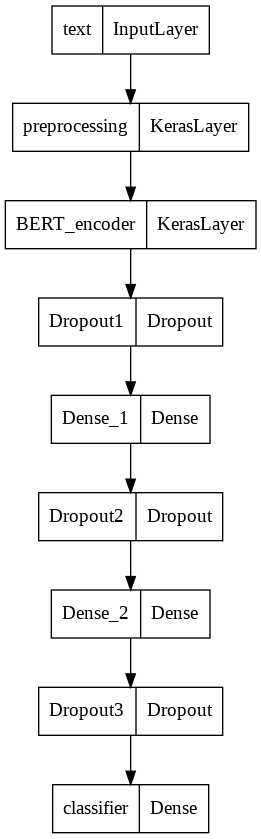

In [29]:
tf.keras.utils.plot_model(classifier_model)

In [30]:
classifier_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [32]:
classifier_model.compile(optimizer=
                         'adam',
                        #  optimizer,
                         loss='binary_crossentropy',
                         metrics='accuracy')

In [47]:
history = classifier_model.fit(x_train, y_train,
                               validation_split=.1,
                               batch_size=264,
                               epochs=1)

2181/2181 [==============================] - 8793s 4s/step - loss: 0.4872 - accuracy: 0.7689 - val_loss: 0.4680 - val_accuracy: 0.7791


In [48]:
history_1 = classifier_model.fit(x_train, y_train,
                               validation_split=.2,
                               batch_size=264,
                               epochs=1)


1939/1939 [==============================] - 7991s 4s/step - loss: 0.4542 - accuracy: 0.7877 - val_loss: 0.4573 - val_accuracy: 0.7840


In [68]:
history_2 = classifier_model.fit(x_train, y_train,
                               validation_split=.2,
                               batch_size=264,
                               epochs=1)

1939/1939 [==============================] - 7958s 4s/step - loss: 0.4607 - accuracy: 0.7842 - val_loss: 0.4470 - val_accuracy: 0.7899


In [80]:
saved_model_path='/content/drive/MyDrive/MachineLearning/NLP/small_bert_128'


In [50]:
from keras.models import load_model

In [81]:
classifier_model.save(saved_model_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/NLP/small_bert_128/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/MachineLearning/NLP/small_bert_128/assets


In [52]:
loaded_model=load_model(saved_model_path)


In [70]:
train_acc=history.history['accuracy']+history_1.history['accuracy']+history_2.history['accuracy']
val_acc=history.history['val_accuracy']+history_1.history['val_accuracy']+history_2.history['val_accuracy']

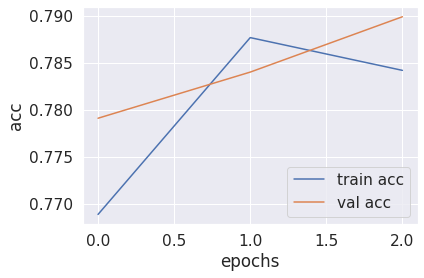

In [71]:
plt.plot(train_acc,label='train acc')
plt.plot(val_acc,label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(loc='lower right')
plt.show();

#Score:

In [72]:
pred=loaded_model.predict(x_test)


In [73]:
pred=pred.reshape(pred.shape[0])

In [74]:
def step(x):
  if x>.5:
    return 1
  elif x<.5:
    return 0

In [75]:
y_pred=list(map(step, pred))


In [76]:
set(y_pred)

{0, 1}

In [60]:
le.inverse_transform(np.array([0]))

array(['negative'], dtype=object)

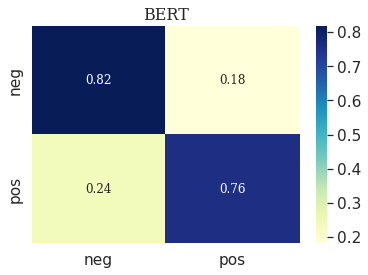

In [78]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred, normalize='true')

ax = plt.axes()
font={"size": 16, "family":'serif'}
ax.set_title('BERT',fontdict=font)

sn.set(font_scale=1.4)
ax=sn.heatmap(cm, annot=True, fmt='2.2f',
            yticklabels=[ 'neg','pos'] ,
           xticklabels=[ 'neg','pos'] ,
           cmap='YlGnBu',ax=ax
           ,annot_kws={"size": 12, "family":'serif'}, 
           );

In [64]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test, y_pred)

0.7889516996423123